


# NumPy


El módulo NumPy (se pronuncia *nampay* o *nampi*, tomeito o tomato... ;-D) se utiliza para trabajar en forma sencilla con arreglos de elementos iguales, típicamente numéricos. 

Como de costumbre, una buena ayuda online se puede encontrar acá: https://www.w3schools.com/python/numpy_intro.asp.

Toda la ayuda está acá: https://numpy.org/

Habíamos visto que se pueden hacer 'secuencias' de elementos 1D, 2D, etc, a través de listas (o tuplas):

In [1]:
A =  [[ 1.0, 0.0, 0.0],[ 0.0, 1.0, 2.0]]

print(A)
print(type(A))

[[1.0, 0.0, 0.0], [0.0, 1.0, 2.0]]
<class 'list'>


Y también vimos que las listas podían contener distintos elementos:

In [2]:
lista_mixta = ['Casa',5,True]
print(lista_mixta)

['Casa', 5, True]


Si bien las listas de Python tienen muchos métodos y son flexibles, no son óptimas para trabajar cuando todos los elementos son iguales. Para eso está NumPy:

In [4]:
import numpy as np

A = np.array([[ 1.0, 0.0, 0.0], [ 0.0, 1.0, 2.0]])

print(A)
type(A)

[[1. 0. 0.]
 [0. 1. 2.]]


numpy.ndarray

In [5]:
B = np.array([1,2,3,4])
print(B)
B.ndim

[1 2 3 4]


1

donde el objeto array creado, tiene varios atributos (y métodos) asociados:

In [6]:
A.ndim

2

In [8]:
print(A.shape)
print(B.shape)

(2, 3)
(4,)


In [9]:
A.size

6

In [10]:
A.dtype

dtype('float64')

In [11]:
A.itemsize

8

In [12]:
help(np.ndarray.itemsize)

Help on getset descriptor numpy.ndarray.itemsize:

itemsize
    Length of one array element in bytes.
    
    Examples
    --------
    >>> x = np.array([1,2,3], dtype=np.float64)
    >>> x.itemsize
    8
    >>> x = np.array([1,2,3], dtype=np.complex128)
    >>> x.itemsize
    16



In [13]:
C = [2,3,4]
print(type(C))
D = np.array(C)
print(D)
print(type(D))


<class 'list'>
[2 3 4]
<class 'numpy.ndarray'>


Otro ejemplo (utilizando el iterador 'range' visto ateriormente):

In [15]:
range(15)
B = np.array(range(15))
B
print(B.ndim)

1


In [16]:
B = B.reshape(3, 5)
B

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [17]:
print('Cantidad de filas y columnas: ', B.shape)

print('Dimensiones: ', B.ndim)

print('Tipo de datos: ', B.dtype.name)

print('Cantidad de bytes por item: ', B.itemsize)

print('Cantidad de elementos en el array: ', B.size)

type(B)



Cantidad de filas y columnas:  (3, 5)
Dimensiones:  2
Tipo de datos:  int64
Cantidad de bytes por item:  8
Cantidad de elementos en el array:  15


numpy.ndarray

### Creación de arrays

Un error común es tratar de crear el array con una secuencia de números, en lugar de usar una lista o una tupla

In [18]:
C = np.array(1,2,3,4)    # <---No


TypeError: array() takes from 1 to 2 positional arguments but 4 were given

In [21]:
C = np.array([1,2,3,4])  # <---Si
D = np.array((1,2,3,4))  # <---Si

Con np.array() podemos transformar listas (o tuplas) en arrays 1D, listas de listas en arrays 2D, listas de listas de listas en arrays 3D, etc..

In [19]:
C = np.array([1,2,3,4])

print(C.shape)

E = np.array([[1,2,3,4], [1,2,3,4]])

print(E.shape)

F = np.array([[[1,2,3,4], [1,2,3,4]], [[1,2,3,4], [1,2,3,4]]])

print(F.shape)

(4,)
(2, 4)
(2, 2, 4)


También se puede definir el tipo al momento de creear el array

In [20]:
D = np.array([[1,2], [3,4]], dtype=np.float32)
print(D)
D.dtype

[[1. 2.]
 [3. 4.]]


dtype('float32')

o se puede hacer un cast luego de creado

In [21]:
D = D.astype(np.int32)
print(D)
D.dtype

[[1 2]
 [3 4]]


dtype('int32')

Pre-inicialización de arrays (alloc)

In [27]:
A = np.zeros((3,4))
print(A)

B = np.ones((3,4), dtype = np.int16) # se puede especificar el tipo
print(B)

C = np.empty((3,4)) # sin inicializar a un valor (el resultado puede variar)
print(C)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [22]:
D = np.zeros((2,2,3))
print(D.ndim)
print(D)

3
[[[0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]]]


Con "np.arange", se puede crear secuencias de números, al estilo de 'range', pero devolviendo directamente un array:

In [23]:
A = np.arange( 10, 30, 5 )
print(A)
print(type(A))

B = np.arange( 0, 2, 0.3 ) 
print(B)

[10 15 20 25]
<class 'numpy.ndarray'>
[0.  0.3 0.6 0.9 1.2 1.5 1.8]


Cuando se utiliza 'arange' con argumentos de punto flotante, generalmente no es posible predecir la cantidad de elementos obtenidos, debido a la precisión finita del punto flotante. Por esta razón, usualmente es mejor usar la función 'linspace' que recibe como argumento la cantidad de elementos que queremos, en lugar del paso:

In [33]:
np.linspace( 0, 2, 9 )                 # nueve números de 0 a 2

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

In [24]:
print("Pi en NumPy",np.pi)

Pi en NumPy 3.141592653589793


In [25]:
x = np.linspace( 0, 2*np.pi, 20)       # util para evaluar funciones en muchos puntos
f = np.sin(x)
print(x)
print(f)

[0.         0.33069396 0.66138793 0.99208189 1.32277585 1.65346982
 1.98416378 2.31485774 2.64555171 2.97624567 3.30693964 3.6376336
 3.96832756 4.29902153 4.62971549 4.96040945 5.29110342 5.62179738
 5.95249134 6.28318531]
[ 0.00000000e+00  3.24699469e-01  6.14212713e-01  8.37166478e-01
  9.69400266e-01  9.96584493e-01  9.15773327e-01  7.35723911e-01
  4.75947393e-01  1.64594590e-01 -1.64594590e-01 -4.75947393e-01
 -7.35723911e-01 -9.15773327e-01 -9.96584493e-01 -9.69400266e-01
 -8.37166478e-01 -6.14212713e-01 -3.24699469e-01 -2.44929360e-16]


Un anticipo de la próxima clase:

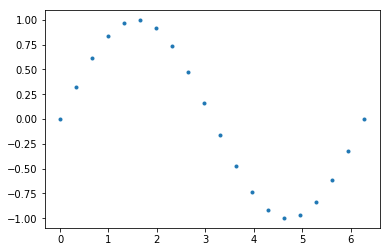

In [37]:
%matplotlib inline      
import matplotlib.pyplot as plt

plt.figure()
plt.plot(x, f, '.')
plt.show()

###  Imprimiendo arrays

Cuando imprime una matriz, NumPy la muestra de forma similar a las listas anidadas, pero con la siguiente distribución:

* el último eje se imprime de izquierda a derecha,
* el penúltimo se imprime de arriba abajo,
* El resto también se imprime de arriba a abajo, con cada corte separado del siguiente por una línea vacía.

Las matrices unidimensionales se imprimen entonces como filas, bidimensionales como matrices y tridimensionales como listas de matrices.

In [26]:
a = np.arange(6)                         # array 1d 
print("a:",a)


b = np.arange(12).reshape(4,3)           # array 2d 
print("b:",b)


c = np.arange(24).reshape(2,3,4)         # array 3d 
print("c:",c)


a: [0 1 2 3 4 5]
b: [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
c: [[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


Si un array es demasiado grande para ser impreso, NumPy omite automáticamente la parte central del array y solo imprime las esquinas:

In [27]:
F = np.arange(0, 100, 0.01)
print(F)

[0.000e+00 1.000e-02 2.000e-02 ... 9.997e+01 9.998e+01 9.999e+01]


In [28]:
print(F.reshape(100,100))

[[0.000e+00 1.000e-02 2.000e-02 ... 9.700e-01 9.800e-01 9.900e-01]
 [1.000e+00 1.010e+00 1.020e+00 ... 1.970e+00 1.980e+00 1.990e+00]
 [2.000e+00 2.010e+00 2.020e+00 ... 2.970e+00 2.980e+00 2.990e+00]
 ...
 [9.700e+01 9.701e+01 9.702e+01 ... 9.797e+01 9.798e+01 9.799e+01]
 [9.800e+01 9.801e+01 9.802e+01 ... 9.897e+01 9.898e+01 9.899e+01]
 [9.900e+01 9.901e+01 9.902e+01 ... 9.997e+01 9.998e+01 9.999e+01]]


Se puede forzar a que imprima todo, haciendo:

In [29]:
np.set_printoptions(threshold=np.inf) #<--- threshold es la cantidad de elementos que acepta imprimir sin truncar

In [30]:
print(F)

[0.000e+00 1.000e-02 2.000e-02 3.000e-02 4.000e-02 5.000e-02 6.000e-02
 7.000e-02 8.000e-02 9.000e-02 1.000e-01 1.100e-01 1.200e-01 1.300e-01
 1.400e-01 1.500e-01 1.600e-01 1.700e-01 1.800e-01 1.900e-01 2.000e-01
 2.100e-01 2.200e-01 2.300e-01 2.400e-01 2.500e-01 2.600e-01 2.700e-01
 2.800e-01 2.900e-01 3.000e-01 3.100e-01 3.200e-01 3.300e-01 3.400e-01
 3.500e-01 3.600e-01 3.700e-01 3.800e-01 3.900e-01 4.000e-01 4.100e-01
 4.200e-01 4.300e-01 4.400e-01 4.500e-01 4.600e-01 4.700e-01 4.800e-01
 4.900e-01 5.000e-01 5.100e-01 5.200e-01 5.300e-01 5.400e-01 5.500e-01
 5.600e-01 5.700e-01 5.800e-01 5.900e-01 6.000e-01 6.100e-01 6.200e-01
 6.300e-01 6.400e-01 6.500e-01 6.600e-01 6.700e-01 6.800e-01 6.900e-01
 7.000e-01 7.100e-01 7.200e-01 7.300e-01 7.400e-01 7.500e-01 7.600e-01
 7.700e-01 7.800e-01 7.900e-01 8.000e-01 8.100e-01 8.200e-01 8.300e-01
 8.400e-01 8.500e-01 8.600e-01 8.700e-01 8.800e-01 8.900e-01 9.000e-01
 9.100e-01 9.200e-01 9.300e-01 9.400e-01 9.500e-01 9.600e-01 9.700e-01
 9.800

In [31]:
np.set_printoptions(precision = 1, threshold=100, edgeitems = 4)


In [32]:
print(F)

[0.e+00 1.e-02 2.e-02 3.e-02 ... 1.e+02 1.e+02 1.e+02 1.e+02]


###  Operaciones básicas

Los operadores aritméticos en arrays se aplican elemento a elemento:

In [36]:
A = np.array([20,30,40,50])
B = np.arange(4)

print('A =', A)
print('B =', B)

A = [20 30 40 50]
B = [0 1 2 3]


In [34]:
A = np.array([20,30,40,50])
B = np.arange(5)

print('A =', A)
print('B =', B)

A = [20 30 40 50]
B = [0 1 2 3 4]


In [37]:
C = A + 2*B
print('C =', C)

C = [20 32 44 56]


In [38]:
D = B**2 + C

print('D =', D)

D = [20 33 48 65]


In [39]:
E = 10*np.cos(A)

print('E =', E)

E = [ 4.1  1.5 -6.7  9.6]


In [40]:
F = A<35
print(A)
print('F =', F)

[20 30 40 50]
F = [ True  True False False]


> A diferencia de muchos lenguajes matriciales, el operador producto `*` opera **elemento a elemento**. 

> (El producto matricial se puede realizar usando `np.dot()`)

In [41]:
A = np.array([[1.0, 0.0], [0.0, 1.0]])

B = np.array([[2.0, 0.0], [3.0, 4.0]] )

C = A*B             #<--- producto elemento a elemento

print(A)
print(B)
print(C)

[[1. 0.]
 [0. 1.]]
[[2. 0.]
 [3. 4.]]
[[2. 0.]
 [0. 4.]]


In [42]:
D = A.dot(B)                # <---- producto matricial

E = np.dot(A, B)                # <---- producto matricial

print(D)
print(E)

[[2. 0.]
 [3. 4.]]
[[2. 0.]
 [3. 4.]]


In [65]:
A = np.ones((2,3), dtype=int)

# A *= 3
A = A*3
print(A)
print(A.dtype)

[[3 3 3]
 [3 3 3]]
int64


In [68]:
B = np.random.random((2,3))
print(B)
B += A    # B = B + A

print(B)
print(B.dtype)

[[0.  1.  0.8]
 [0.7 0.  0.2]]
[[3.  4.  3.8]
 [3.7 3.  3.2]]
float64


In [ ]:
A += B.astype(np.int32)         # B no se convierte a entero automaticamente, ni hay upcasting de A

print(A)
print(A.dtype)

Cuando se opera con arrays de diferentes tipos, el tipo de array resultante corresponde al más general o preciso (un comportamiento conocido como upcasting).

In [69]:
A = np.ones(3, dtype=np.int32)
B = np.linspace(0,np.pi,3)

print(A.dtype)
print(B.dtype)

C = A + B

print(C.dtype)




int32
float64
float64


In [71]:
D = np.exp(C*1j)
print(D)
print(D.dtype)

[ 0.5+0.8j -0.8+0.5j -0.5-0.8j]
complex128


Muchas operaciones, como computar la suma de todos los elementos de un array, son métodos de la clase ndarray.

In [45]:
A = np.random.random((2,3))
A

array([[0.5, 0.7, 0.2],
       [0.4, 0.6, 0.8]])

In [46]:
A.sum()

3.210972898739753

In [47]:
A.min()

0.16929198441994864

In [48]:
A.max()

0.831550274320198

Por defecto, estas operaciones se aplican al array como si se tratara de una lista de números, independientemente de su forma. Sin embargo, al especificar el parámetro de eje, se puede aplicar una operación a lo largo del eje especificado:

In [49]:
B = np.arange(12).reshape(3,4)
B

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [51]:
B.sum(axis=1)                            # suma sobre cada columna

array([ 6, 22, 38])

In [52]:
B.min(axis=1)                            # mínimo de cada fila

array([0, 4, 8])

In [53]:
B.cumsum(axis=1)                         # suma acumulada sobre cada fila

array([[ 0,  1,  3,  6],
       [ 4,  9, 15, 22],
       [ 8, 17, 27, 38]])

NumPy proporciona funciones matemáticas tales como sin, cos y exp. Dentro de NumPy, estas funciones operan elemento a elemento, produciendo una array como salida.

In [ ]:
B = np.arange(3)
B

In [ ]:
np.exp(B)

In [ ]:
np.sqrt(B)

In [ ]:
C = np.array([2., -1., 4.])

np.add(B, C)

### Indexado, slicing e iteración sobre arrays

Los arrays 1D pueden indexarse, rebanarse e iterar sobre ellos, exactamente igual a como se hace con las listas de Python.

In [60]:
A = np.arange(10)**3
A

array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729])

In [55]:
A[2]

8

In [56]:
A[2:5]

array([ 8, 27, 64])

In [57]:
A[:6:3] = -1000 
A

array([-1000,     1,     8, -1000,    64,   125,   216,   343,   512,
         729])

In [58]:
A[::-1]                               

array([  729,   512,   343,   216,   125,    64, -1000,     8,     1,
       -1000])

In [61]:
for elem in A:
    print(elem**(1/3.0))

0.0
1.0
2.0
3.0
3.9999999999999996
4.999999999999999
5.999999999999999
6.999999999999999
7.999999999999999
8.999999999999998


Otro ejemplo:

In [62]:
B = (15*np.random.random([4,5])).astype(np.int32)
B

array([[ 5, 11,  2, 10,  9],
       [13,  1,  4, 12, 11],
       [ 7,  3, 10,  7,  2],
       [ 5,  0, 12,  7,  5]], dtype=int32)

In [63]:
B[2,3]

7

In [64]:
B[0:5, 1]                   # todos los elementos de la segunda columna

array([11,  1,  3,  0], dtype=int32)

In [66]:
B[:,2]                        # lo mismo

array([ 2,  4, 10, 12], dtype=int32)

In [68]:
B[1:3,:]                      # todos los elementos de la segunda y tercer fila

array([[13,  1,  4, 12, 11],
       [ 7,  3, 10,  7,  2]], dtype=int32)

Cuando se proporcionan menos índices que la cantidad de ejes, los índices que faltan se consideran como el slice completo:

In [ ]:
B[-1]                        # última fila. Equivalente a B[-1,:]

La expresión 'B[i]' se trata como un 'i' seguido de tantas instancias de ':' como sea necesario para representar los ejes restantes. NumPy también le permite escribir esto usando puntos: 'B[i, ...]'.

Los puntos (...) representan tantos puntos como sea necesario para producir una tupla de indexación completa. Por ejemplo, si X es un array de rango 5 (es decir, tiene 5 ejes), entonces:

* X[1,2, ...]    es equivalente a    X[1,2,:,:,:], 
* X[..., 3]    a    X[:,:,:,:, 3] y 
* X[ 4, ..., 5 ,:]    a    X[4,:,:, 5 ,:].

In [90]:
C = np.array( [[[  0,  1,  2],               # a 3D array (two stacked 2D arrays)
                [ 10, 12, 13]],
               [[100,101,102],
                [110,112,113]]])
C.shape

(2, 2, 3)

In [91]:
C[1,...]                                   # same as c[1,:,:] or c[1]

array([[100, 101, 102],
       [110, 112, 113]])

In [92]:
C[...,2]                                   # same as c[:,:,2]

array([[  2,  13],
       [102, 113]])

Iterar sobre arrays multidimensionales se hace con respecto al primer eje:

In [93]:
for row in B:
    print(row)


[ 9  1  5 11  5]
[11  1 14  7 12]
[ 8  5 12  1 11]
[13 13  0 10  2]


Sin embargo, si uno desea realizar una operación en cada elemento del array, se puede usar el atributo flat, que es un iterador sobre todos los elementos:

In [ ]:
for element in B.flat:
    print(element)

## Cambio de forma de un array

In [69]:
A = np.floor(10*np.random.random((3,4)))
A

array([[5., 5., 7., 8.],
       [6., 9., 3., 3.],
       [4., 1., 3., 7.]])

In [70]:
A.shape

(3, 4)

La forma de un array se puede cambiar con varios comandos. Los siguientes tres comandos devuelven un array modificado, pero no cambian el array original:

In [71]:
A.ravel()  # devuelve un array lineal con todos los elementos del array original

array([5., 5., 7., 8., 6., 9., 3., 3., 4., 1., 3., 7.])

In [72]:
A.reshape(6,2)  # devuelve un array cambiandole la forma al primero

array([[5., 5.],
       [7., 8.],
       [6., 9.],
       [3., 3.],
       [4., 1.],
       [3., 7.]])

In [73]:
A.T  # devuelve el array transpuesto

array([[5., 6., 4.],
       [5., 9., 1.],
       [7., 3., 3.],
       [8., 3., 7.]])

In [74]:
A.T.shape

(4, 3)

In [75]:
A.shape

(3, 4)

La función de reshape devuelve un array modificado, mientras que el método ndarray.resize modifica el array mismo:

In [76]:
A

array([[5., 5., 7., 8.],
       [6., 9., 3., 3.],
       [4., 1., 3., 7.]])

In [78]:
A.resize((6,2))
A
print(A.shape)

(6, 2)


Si una dimensión se da como -1 en a reshape, las otras dimensiones se calculan automáticamente:

In [ ]:
A.reshape(2,-1)

### Apilando arrays

In [79]:
A = np.floor(10*np.random.random((2,2)))
A

array([[5., 6.],
       [8., 9.]])

In [80]:
B = np.floor(10*np.random.random((2,2)))
B

array([[0., 2.],
       [0., 3.]])

In [81]:
C = np.vstack((A,B)) # vertical stack
print(C)
print(C.shape)

[[5. 6.]
 [8. 9.]
 [0. 2.]
 [0. 3.]]
(4, 2)


In [82]:
C = np.hstack((A,B)) # horizontal stack
print(C)
print(C.shape)

[[5. 6. 0. 2.]
 [8. 9. 0. 3.]]
(2, 4)


In [110]:
C = np.dstack((A,B))   # depth stack
print(C)
print(C.shape)

[[[6. 4.]
  [8. 3.]]

 [[8. 3.]
  [3. 1.]]]
(2, 2, 2)


In [111]:
np.concatenate((A,B), axis=0)

array([[6., 8.],
       [8., 3.],
       [4., 3.],
       [3., 1.]])

In [112]:
np.concatenate((A, B), axis=1)

array([[6., 8., 4., 3.],
       [8., 3., 3., 1.]])

In [113]:
A = np.floor(10*np.random.random([10,10]))
B = np.floor(10*np.random.random([10,10]))

print(A.shape)
print(B.shape)

C = np.concatenate((A[..., np.newaxis], B[..., np.newaxis]), axis=2)

print(C.shape)

(10, 10)
(10, 10)
(10, 10, 2)


Usando hsplit, se puede dividir un array a lo largo de su eje horizontal, especificando el número de arrays (de igual forma) que devuelve, o especificando las columnas después de las cuales debería ocurrir la división:

In [83]:
A = np.floor(10*np.random.random((2,12)))
A

array([[9., 0., 9., 7., 4., 0., 7., 5., 0., 7., 4., 8.],
       [4., 1., 3., 6., 8., 1., 0., 5., 4., 1., 8., 3.]])

In [85]:
A1, A2, A3 = np.hsplit(A,3)   # Split en 3

print(A1)
print(A2)
print(A3)

[[9. 0. 9. 7.]
 [4. 1. 3. 6.]]
[[4. 0. 7. 5.]
 [8. 1. 0. 5.]]
[[0. 7. 4. 8.]
 [4. 1. 8. 3.]]


In [86]:
A1, A2, A3 = np.hsplit(A,(3,5))   # Split en la tercera y quita columna del array original

print(A1)
print(A2)
print(A3)

[[9. 0. 9.]
 [4. 1. 3.]]
[[7. 4.]
 [6. 8.]]
[[0. 7. 5. 0. 7. 4. 8.]
 [1. 0. 5. 4. 1. 8. 3.]]


## Seleccionando elementos

In [87]:
A = np.arange(10)
print(A)
B = np.random.random(10)
print(B)

[0 1 2 3 4 5 6 7 8 9]
[0.4 0.9 0.6 0.9 1.  0.8 0.8 0.9 0.5 0.3]


In [88]:
C = np.where(A<5)    #where llamado con un solo argumento devuelve una tupla
print(C[0])
print(C[0].shape)

[0 1 2 3 4]
(5,)


In [89]:
np.where(A<5,A,B)

array([0. , 1. , 2. , 3. , 4. , 0.8, 0.8, 0.9, 0.5, 0.3])